### Preamble

Contains imports and some utility code.

In [1]:
!curl -s "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py" > "module_update.py"

In [1]:
from module_update import update, css, code_toggle

In [2]:
css()

In [3]:
update('nbtext', overwrite=True)  # may remove overwrite=True
update('graph_networkx_louvain', overwrite=True)
import graph_networkx_louvain as gnl
import nbtext as nb
import networkx as nx
%matplotlib inline

Updated file `C:\Users\larsj\Documents\GitHub\Tutorial-DHN2019\nbtext.py`

Updated file `C:\Users\larsj\Documents\GitHub\Tutorial-DHN2019\graph_networkx_louvain.py`

In [4]:
def frame_sort(frame, by=0):
    return frame.sort_values(by=by, ascending=False)

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Collocations

The term collocation has traditionally been restricted to words that are juxtaposed together as phrases like “strong coffee”, “strict regime” or “eat dinner”. Here we take collocations to be realized as skipgrams, or as word pairs that simply cooccur within a context which in itself is a contiguous sequence of words, typically a paragraph or a window of n words around a given word. Juxtaposed collocates will also be part of the result set. 


### Define a corpus

Using dewey decimal to restrict corpus 

In [6]:
corpus_urns = nb.get_urn({
    'ddk':"641.2%", 
    'year':1960, 
    'next':60, 
    'lang':'nob', 
    'limit': 200
})

print(len(corpus_urns), corpus_urns[:5])

169 [[2013102308111, 'Torres, Miguel A.', 'Vin for vinelskere', 1981], [2011021403029, 'Strætkvern, Sigrid', 'Øl med kniv &amp; gaffel', 2011], [2011012703006, 'Hagerup, Klaus', 'Lykke i Piemonte', 2009], [2016070548078, 'Clarke, Oz', 'Druer og viner fra hele verden', 2002], [2015072308389, 'Lundberg, Stig', 'Vin', 1984]]


### Make a collocation for a word from the corpus

Here we go step by step. The process may be collected into one general script.

First, collect the words around a given word and count the result.

In [7]:
collword = 'rødvin'

In [8]:
rødvin = nb.urn_coll('rødvin', urns = corpus_urns, after = 5, before = 5, limit = 1000)

In [9]:
rødvin.head()

,0
",",3442
.,3112
og,2002
en,1945
er,1228


We want to measure how this differs from a reference. Two point themselves out, the collection of all books, and the corpus itself.

All books

In [10]:
tot = nb.frame(nb.totals(top = 50000))

In [11]:
tot.head()

,0
.,1265723110
",",1105303412
og,543432056
i,460246057
det,273411583


So we have three wordbags, the collocation, the corpus counts, and the total count of all books. Let us also normalize them, so values more easily can be compared.

In [12]:
nb.normalize_corpus_dataframe(tot)
nb.normalize_corpus_dataframe(rødvin)

True

In [13]:
coll_all = frame_sort(rødvin**1.0/tot)

In [14]:
coll_all.head(20)

,0
hvitvin,3962.766229
Bordeaux,750.518510
Kraftig,648.793316
rødvin,626.435502
fyldig,547.990075
drikkes,439.359617
Chateau,406.508348
druer,352.769189
saftig,325.909706
portvin,323.628645


A quick check with concordances may point to:

In [15]:
nb.get_urnkonk('drikkes', {'urns':corpus_urns, 'limit':5})

"Vin for vinelskere, Torres, Miguel A., 1981",", men som også kan",drikkes,ung i løpet av det
"Vin for vinelskere, Torres, Miguel A., 1981",søte eller likøraktige hvite vinene,drikkes,idag relativt sjelden og har
"Vin for vinelskere, Torres, Miguel A., 1981",Dette betyr at rosévin bør,drikkes,"tidlig , senest et halvt"
"Vin for vinelskere, Torres, Miguel A., 1981",også den vin som det,drikkes,mest av i hele verden
"Vin for vinelskere, Torres, Miguel A., 1981",Den hvite fordi den skal,drikkes,"umiddelbart til forretten , og"
"Øl med kniv & gaffel, Strætkvern, Sigrid, 2011","pils , og den kan",drikkes,rett fra boksen . Ved
"Øl med kniv & gaffel, Strætkvern, Sigrid, 2011",. Et kraftig øl kan,drikkes,mer temperert enn pils .
"Øl med kniv & gaffel, Strætkvern, Sigrid, 2011",signaler om hvordan ølet skal,drikkes,. Små glass inviterer til
"Øl med kniv & gaffel, Strætkvern, Sigrid, 2011",eller hveteølet,drikkes,av et litt tykt holder
"Lykke i Piemonte, Hagerup, Klaus, 2009",barolo som kunne selges og,drikkes,tidlig . Det siste var
"Lykke i Piemonte, Hagerup, Klaus, 2009",) . De kunne likevel,drikkes,på grunn av en svært


## Inspect collocations

Let's make a huge graph. Each node is expanded. We do the exercise for both reference corpuses (corpora).

In [17]:
coll_all.index[:20] # Let us select the 20 highest

Index(['hvitvin', 'Bordeaux', 'Kraftig', 'rødvin', 'fyldig', 'drikkes',
       'Chateau', 'druer', 'saftig', 'portvin', 'portugisisk', 'druene',
       'viner', 'vinene', 'Enkel', 'Vinmonopolet', 'Frisk', 'Spanias', 'Blanc',
       'Italiensk'],
      dtype='object')

In [19]:
words_to_expand = list(coll_all.index[:21])
words_to_expand

['hvitvin',
 'Bordeaux',
 'Kraftig',
 'rødvin',
 'fyldig',
 'drikkes',
 'Chateau',
 'druer',
 'saftig',
 'portvin',
 'portugisisk',
 'druene',
 'viner',
 'vinene',
 'Enkel',
 'Vinmonopolet',
 'Frisk',
 'Spanias',
 'Blanc',
 'Italiensk',
 'aroma']

We want to create a collocation for each of the words, and collect all in a graph. We repeat the collocation making for each word in our list.

for each word make a collocation for that word using the corpus URNs:

In [20]:
collocations = {word: nb.urn_coll(word, urns=corpus_urns) for word in words_to_expand}

We may inspect the collocations:

In [21]:
for w in collocations:
    print(w, list(collocations[w].index[:20]))
    print()

hvitvin [',', '.', 'og', 'en', 'er', 'som', 'av', 'i', 'med', 'tørr', 'til']

Bordeaux [',', '.', 'i', 'og', 'fra', 'er', 'som', 'de', 'av', 'en', 'for']

Kraftig ['.', ',', 'og', 'med', 'vin', 'duft', 'på', 'av', ':', 'smak', 'i']

rødvin [',', '.', 'og', 'en', 'er', 'av', 'som', 'med', 'i', 'til', 'for']

fyldig [',', '.', 'og', 'med', 'en', 'vin', 'er', 'duft', 'på', 'Middels', 'middels']

drikkes ['.', ',', 'og', 'som', 'er', 'de', 'bør', 'kan', 'den', 'til', 'unge']

Chateau [',', 'Chateau', '.', 'de', 'i', 'og', '*', '(', 'er', ')', 'som']

druer [',', '.', 'av', 'og', 'er', 'som', 'i', 'fra', 'med', 'en', 'på']

saftig [',', 'og', '.', 'med', 'vin', 'en', 'duft', 'på', 'er', 'fyldig', 'frukt']

portvin [',', '.', 'og', 'som', 'er', 'i', 'av', 'en', 'til', 'med', 'for']

portugisisk [',', '.', 'og', 'vin', 'er', 'for', 'en', 'i', 'med', 'på', ')']

druene ['.', ',', 'og', 'i', 'av', 'de', 'er', 'som', 'til', 'på', 'at']

viner [',', '.', 'av', 'er', 'og', 'i', 'som', 'fra', 'de',

Normalize

In [22]:
for w in collocations:
    nb.normalize_corpus_dataframe(collocations[w])

These undergo same procedure as with the original

In [23]:
collocations_weight = {w:frame_sort(collocations[w]/tot) for w in collocations}

In [24]:
for w in collocations_weight:
    print(w, list(collocations_weight[w].index[:20]))
    print()

hvitvin ['rødvin', 'tørr', 'Blanc', 'hvitvin', 'druer', 'drikkes', 'druene', 'fyldig', 'syrlig', 'Champagne', 'søt']

Bordeaux ['Bordeaux', 'vinene', 'Chateau', 'Blanc', 'viner', 'Champagne', 'Sec', 'rødvin', 'druene', 'Julien', 'Kraftig']

Kraftig ['syrlig', 'duft', 'rødvin', 'saftig', 'Bordeaux', 'Fylde', 'Dyp', 'Farge', 'fyldig', 'humle', 'krydret']

rødvin ['hvitvin', 'Bordeaux', 'Kraftig', 'rødvin', 'fyldig', 'drikkes', 'Chateau', 'druer', 'saftig', 'portvin', 'portugisisk']

fyldig ['duft', 'Middels', 'syrlig', 'Rik', 'saftig', 'aroma', 'Fylde', 'rødvin', 'syre', 'hvitvin', 'Smak']

drikkes ['vinene', 'viner', 'avkjølt', 'Vinen', 'vinen', 'drikkes', 'hvitvin', 'Blanc', 'rødvin', 'Beste', 'tappes']

Chateau ['Chateau', 'Blanc', 'Bordeaux', 'Tour', 'Ste', 'Palmer', 'Michelle', 'vinene', 'viner', 'Simone', 'Petrus']

druer ['viner', 'tørkede', 'druer', 'innkjøpte', 'Grønne', 'hektar', 'modne', 'vinene', 'Blanc', 'druene', 'aromatiske']

saftig ['syrlig', 'duft', 'fyldig', 'Rik', 'Kr

## Final step

Turn it all into a graph. Create a graph and populate it with edges.

In [25]:
# start with an empty list of edges

edges = []

In [27]:
# add elements from words_to_expand

for x in words_to_expand:
    edges.append((collword, x, float(coll_all.loc[x])))


After the first edges are added, we can have a look at them

In [28]:
edges

[('rødvin', 'hvitvin', 3962.766229456532),
 ('rødvin', 'Bordeaux', 750.5185097375278),
 ('rødvin', 'Kraftig', 648.7933158713827),
 ('rødvin', 'rødvin', 626.4355021028064),
 ('rødvin', 'fyldig', 547.9900754657452),
 ('rødvin', 'drikkes', 439.3596173122891),
 ('rødvin', 'Chateau', 406.5083481332853),
 ('rødvin', 'druer', 352.7691886581978),
 ('rødvin', 'saftig', 325.9097058331794),
 ('rødvin', 'portvin', 323.6286454510503),
 ('rødvin', 'portugisisk', 320.8151490360462),
 ('rødvin', 'druene', 291.8479322872633),
 ('rødvin', 'viner', 273.0917672995892),
 ('rødvin', 'vinene', 268.07133687912466),
 ('rødvin', 'Enkel', 240.95903194993662),
 ('rødvin', 'Vinmonopolet', 239.11035239660035),
 ('rødvin', 'Frisk', 237.5150554506413),
 ('rødvin', 'Spanias', 216.46577938418739),
 ('rødvin', 'Blanc', 214.87724544145553),
 ('rødvin', 'Italiensk', 211.79158908126962),
 ('rødvin', 'aroma', 194.43188053975047)]

Create a graph over the edges

In [29]:
G = nx.Graph()

Add the edges

In [30]:
G.add_weighted_edges_from(edges)

Draw the graph using module gnl

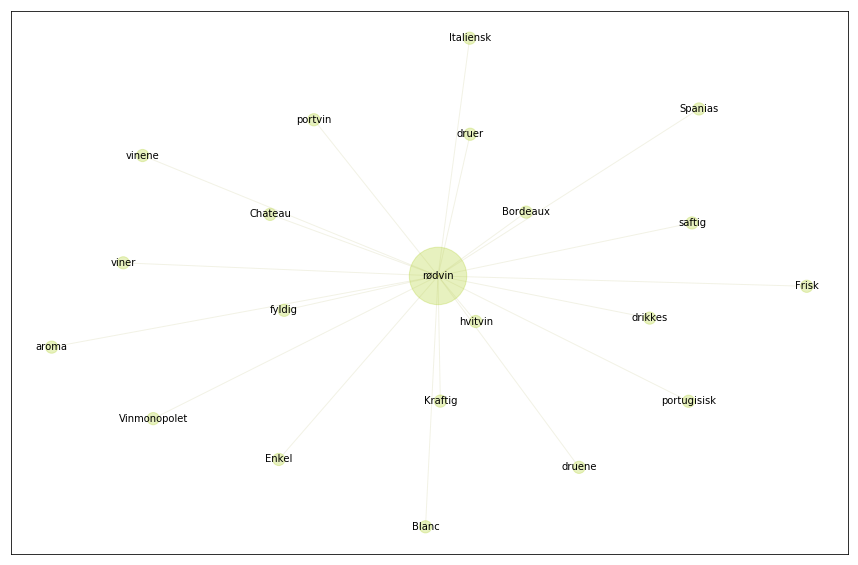

In [31]:
gnl.show_graph(G)

Next add all the edges from `collocations_weight`. We just select the 11 first, just like the first. This could be made sensitive to the actual structure of the collocation.

In [32]:
rest_edges = []

In [33]:
for w in collocations_weight:
    for word in collocations_weight[w].index[:20]:
        rest_edges.append((w, word, float(collocations_weight[w].loc[word])))

Add the latest edges to G

In [34]:
G.add_weighted_edges_from(rest_edges)

Print the graph which displays interconnections and clustering

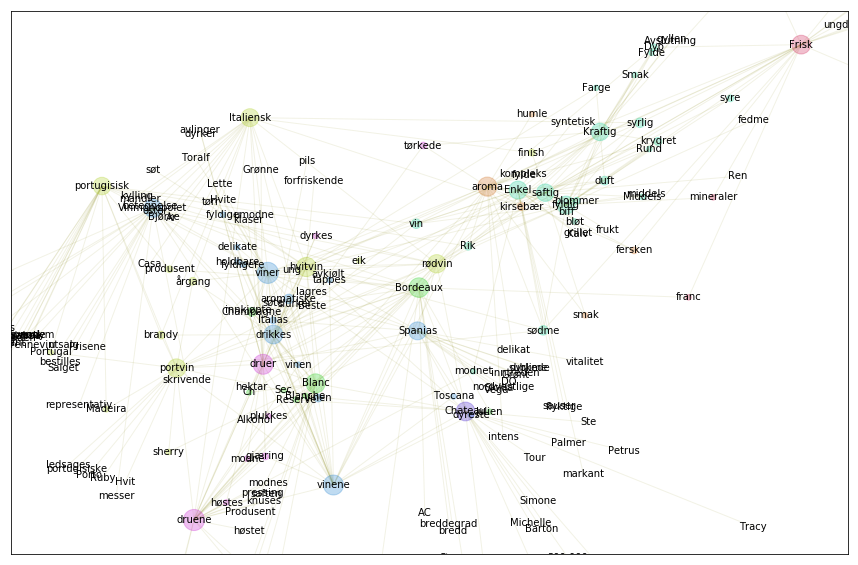

In [38]:
gnl.show_graph(G, spread = 0.01)

In [36]:
gnl.show_communities(G)

hvitvin-rødvin :  hvitvin, rødvin, portvin, Italiensk, portugisisk, årgang, brandy, produsent, finish, Madeira, Portugal, sherry, oster, Interessant, Porto, synonym, Garcia, umoden, Ar, mandler, Spansk, kylling, Ruby, forfriskende, J.M, Lisboa, søt, ledsages, betegnelse, tørr, portugisiske, spansk, Bjørke, Hvit, verde, Casa

Bordeaux-Blanc :  Bordeaux, Blanc, Champagne, Ch, Reserve, Blanche, Julien, Sec, Produsent, Stammer, Zealand, NY, bredd, Alkohol, breddegrad, Grand, VURDERING, AC, Frankrike

aroma-fyldig :  aroma, fyldig, Enkel, saftig, Kraftig, vin, sødme, syrlig, duft, kirsebær, Rik, krydret, syre, fersken, plommer, Dyp, Fylde, mineraler, modnet, humle, smak, bløt, Middels, Farge, eik, Rund, Smak, Mørk, Kalv, fylde, flyktige, biff, Ren, fedme, intens, markant, grillet, frukt, delikat, Avslutning, middels, syntetisk, gyllen, kompleks, sauser

viner-vinene :  viner, vinene, drikkes, Spanias, Vinmonopolet, aromatiske, Vinen, Italias, fyldigere, delikate, tappes, fyldige, Toscana, h